# Artifical Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.1'

In [3]:
keras.__version__

'2.4.0'

## Prepare the dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

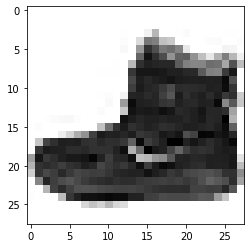

9 Ankle boot


In [8]:
fig = plt.figure
plt.imshow(X_train_full[0], cmap='gray_r')
plt.show()

# This array lists the classes of the label
# the labels are stored as indices of the classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(y_train_full[0], class_names[y_train_full[0]])
# This label index of the image is 9, and it corresponds to the class Ankle boot

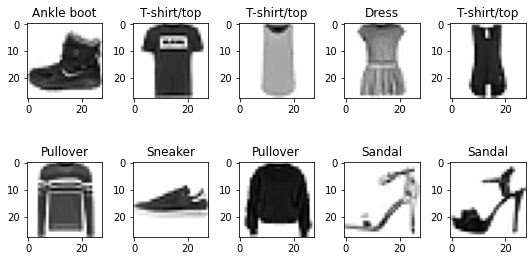

In [9]:
# here I alos write this function to show the first 10 images in the dataset
# you can see there are clothes belonging to different classes, such as Ankle boot, T-shirt
# Our aim is to build a classifer that can classify the images to their classes
def image_plot(X, y, num=10):
    # plot data
    num_row = 2
    num_col = 5

    images = X[:num]
    labels = y[:num]

    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray_r')
        ax.set_title('{}'.format(class_names[labels[i]]))
    plt.tight_layout()
    plt.show()

image_plot(X_train_full, y_train_full)

In [10]:
# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [11]:
# Converts a class vector (integers) to one-hot encoding matrix.
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

y_train_full[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
# get validation dataset
# then we need to get the validation dataset. We take 5 thoudsands images randomly from the training data, as the validation data
np.random.seed(42) 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

## Create the ANN with TensorFlow's Keras API

<img src="ANNArchitecture.png" width="30%">

In [13]:
# The model starts with a input layer with 28 x 28 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
print(model.layers)
# get layers by index
model.layers[0]
# get layers by name
# model.get_layer('dense_1')

[<tensorflow.python.keras.layers.core.Flatten object at 0x7fb1721b50a0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fb1809a6040>, <tensorflow.python.keras.layers.core.Dense object at 0x7fb1721bba90>, <tensorflow.python.keras.layers.core.Dense object at 0x7fb1808e4ca0>]


In [16]:
# look at how the parameters are initialised

weights, biases = model.layers[1].get_weights()
print(weights.shape, weights)
print(biases.shape, biases)

(784, 300) [[-0.07107058 -0.06328881 -0.02252968 ... -0.06036731  0.04651257
  -0.05537327]
 [ 0.02662961  0.06046876 -0.00426799 ...  0.00623906  0.04805772
   0.06556775]
 [ 0.07139771 -0.04688122  0.04297786 ... -0.03515543  0.02705774
   0.02884015]
 ...
 [ 0.04228527  0.04894388  0.05855811 ... -0.06446708 -0.0396016
  -0.00129052]
 [-0.06735526  0.0200757  -0.01082698 ... -0.01433063  0.01098213
  -0.06775238]
 [ 0.05719735  0.02062506  0.05445826 ...  0.00962873 -0.0413871
  -0.05984972]]
(300,) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Compile and train the model

In [17]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, batch_size=30, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1834/1834 [==============================] - 2s 910us/step - loss: 0.7105 - accuracy: 0.7667 - val_loss: 0.5832 - val_accuracy: 0.7816
Epoch 2/30
1834/1834 [==============================] - 2s 844us/step - loss: 0.4819 - accuracy: 0.8322 - val_loss: 0.4924 - val_accuracy: 0.8220
Epoch 3/30
1834/1834 [==============================] - 2s 862us/step - loss: 0.4350 - accuracy: 0.8481 - val_loss: 0.4277 - val_accuracy: 0.8500
Epoch 4/30
1834/1834 [==============================] - 2s 838us/step - loss: 0.4097 - accuracy: 0.8562 - val_loss: 0.4516 - val_accuracy: 0.8376
Epoch 5/30
1834/1834 [==============================] - 2s 849us/step - loss: 0.3891 - accuracy: 0.8641 - val_loss: 0.4058 - val_accuracy: 0.8522
Epoch 6/30
1834/1834 [==============================] - 2s 851us/step - loss: 0.3733 - accuracy: 0.8678 - val_loss: 0.4114 - val_accuracy: 0.8528
Epoch 7/30
1834/1834 [==============================] - 2s 872us/step - loss: 0.3592 - accuracy: 0.8727 - val_loss: 0.3885 -

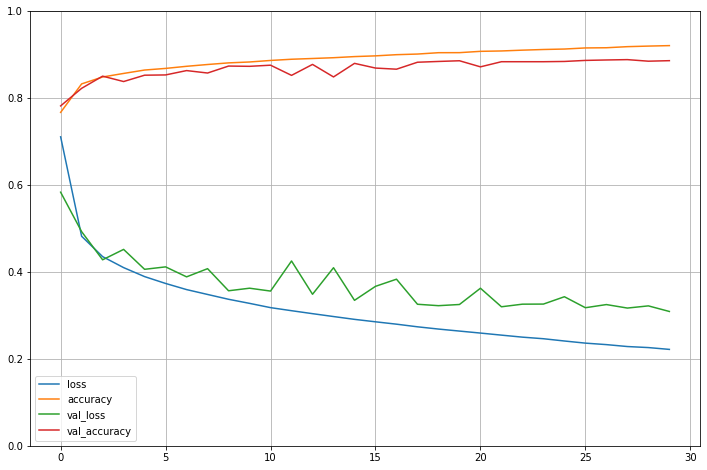

In [19]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 601us/step - loss: 0.3296 - accuracy: 0.8859


[0.32963767647743225, 0.8859000205993652]

## Make predictions

In [21]:
y_prob = model.predict(X_test[:3])
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   , 0.033, 0.001,
        0.953],
       [0.   , 0.   , 0.997, 0.   , 0.003, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [22]:
# y_pred = model.predict_classes(X_test[:3])
y_pred = np.argmax(model.predict(X_test[:3]), axis=-1)
print(y_pred)
print("Prediction: ", [class_names[i] for i in y_pred])


[9 2 1]
Prediction:  ['Ankle boot', 'Pullover', 'Trouser']


## Saving and Restoring a Model

In [27]:
model.save("keras_model.h5")

In [28]:
model = keras.models.load_model("keras_model.h5")

In [29]:
y_pred = np.argmax(model.predict(X_test[:3]), axis=-1)
print(y_pred)
print("Prediction: ", [class_names[i] for i in y_pred])

[9 2 1]
Prediction:  ['Ankle boot', 'Pullover', 'Trouser']
